### Import Libraries

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                           confusion_matrix, ConfusionMatrixDisplay, 
                           RocCurveDisplay)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

### Load Dataset

In [2]:
cancer = load_breast_cancer()
X = cancer.data  # 30 features (mean radius, texture, etc.)
y = cancer.target  # 0=malignant, 1=benign

### Split Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

### Standardize Features

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Hyperparameter tuning with GridSearchCV

In [5]:
param_grid = {'n_neighbors': np.arange(1, 30),
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}  # 1=Manhattan, 2=Euclidean

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

### Best parameters

In [6]:
print(f"Optimal K: {knn_cv.best_params_['n_neighbors']}")
print(f"Best weights: {knn_cv.best_params_['weights']}")
print(f"Best distance metric (p): {knn_cv.best_params_['p']}\n")

Optimal K: 3
Best weights: uniform
Best distance metric (p): 1



### Train, Test, Split, Evaluate

In [7]:
# Train with best parameters
best_knn = knn_cv.best_estimator_
best_knn.fit(X_train, y_train)
# Predictions
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]  # Probabilities for ROC
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

Accuracy: 0.959

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.92      0.94        64
      benign       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### Confusion Matrix 

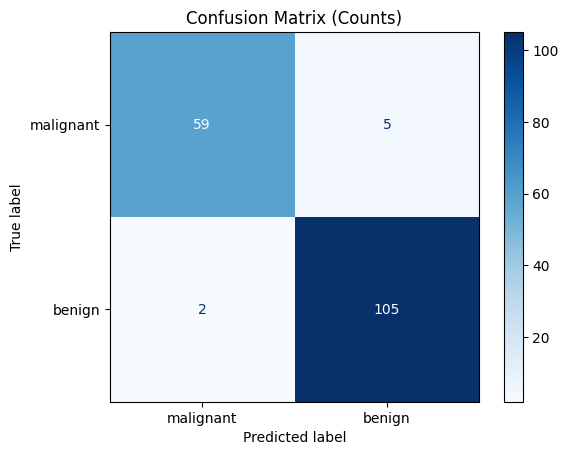

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=cancer.target_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Counts)")
plt.show()

### ROC Curve

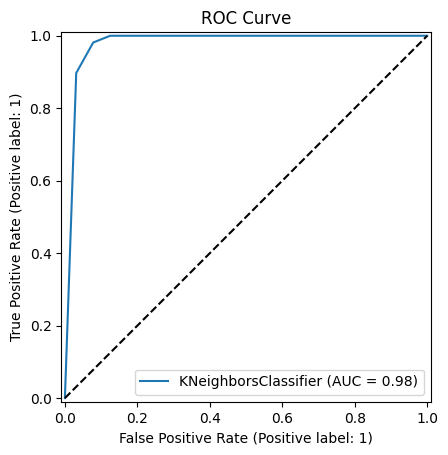

In [9]:
RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve")
plt.show()

### K-Value Performance Analysis

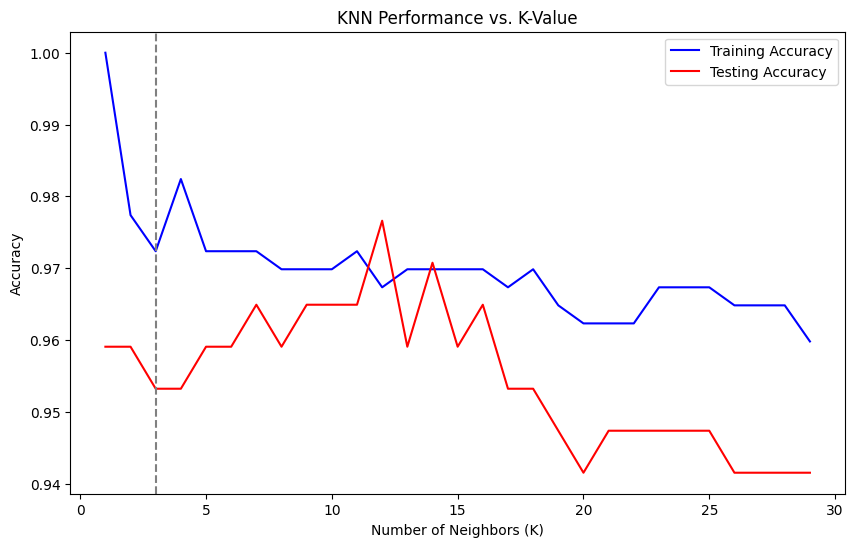

In [10]:
k_values = np.arange(1, 30)
train_acc = []
test_acc = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.figure(figsize=(10,6))
plt.plot(k_values, train_acc, 'b-', label='Training Accuracy')
plt.plot(k_values, test_acc, 'r-', label='Testing Accuracy')
plt.axvline(x=knn_cv.best_params_['n_neighbors'], color='gray', linestyle='--')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.legend()
plt.title("KNN Performance vs. K-Value")
plt.show()